<a href="https://colab.research.google.com/github/RajBhadani/Data-Mining-Project/blob/main/Early_Stage_Diabetes_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understand The Problem Statement**

The goal of this project is to build a predictive model to identify individuals at risk of early-stage diabetes based on a given dataset of symptoms and demographic information. Early detection and prediction of diabetes risk can lead to timely intervention and management, potentially preventing or delaying the onset of more severe complications.

# **Importing Necessary Libraries and Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, f1_score

In [ ]:
df = pd.read_csv('diabetes_data_upload.csv')
df.head()

Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      Yes     Yes  Positive  
1             Yes               No      Yes      No  Positive  
2              No              Yes      Yes      No  Positive  
3              No               No       No      No  Positive  
4             Yes              Yes      Yes     Yes  Positive

# **Data Preprocessing**

In [ ]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

**Prepare the Data**

In [ ]:
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target variable

In [ ]:
X = pd.get_dummies(X, drop_first=True)  # drop_first to avoid multicollinearity

# **Model Training**

**Split Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

**Create and train the model**

In [ ]:
model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Print Text Representation**

In [ ]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_14 <= 0.50
|   |   |   |--- feature_0 <= 34.50
|   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |--- class: Negative
|   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |--- class: Positive
|   |   |   |--- feature_0 >  34.50
|   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |--- class: Positive
|   |   |   |   |--- feature_10 >  0.50
|   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |--- class: Negative
|   |   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |   |--- class: Positive
|   |   |--- feature_14 >  0.50
|   |   |   |--- feature_11 <= 0.50
|   |   |   |   |--- class: Positive
|   |   |   |--- feature_11 >  0.50
|   |   |   |   |--- class: Negative
|   |--- feature_1 >  0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_10 <= 0.50
|   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |--- c

In [ ]:
#If you want to save it to the file, it can be done with following code:
with open("decision_tree.jpg", "w") as fout:
    fout.write(text_representation)

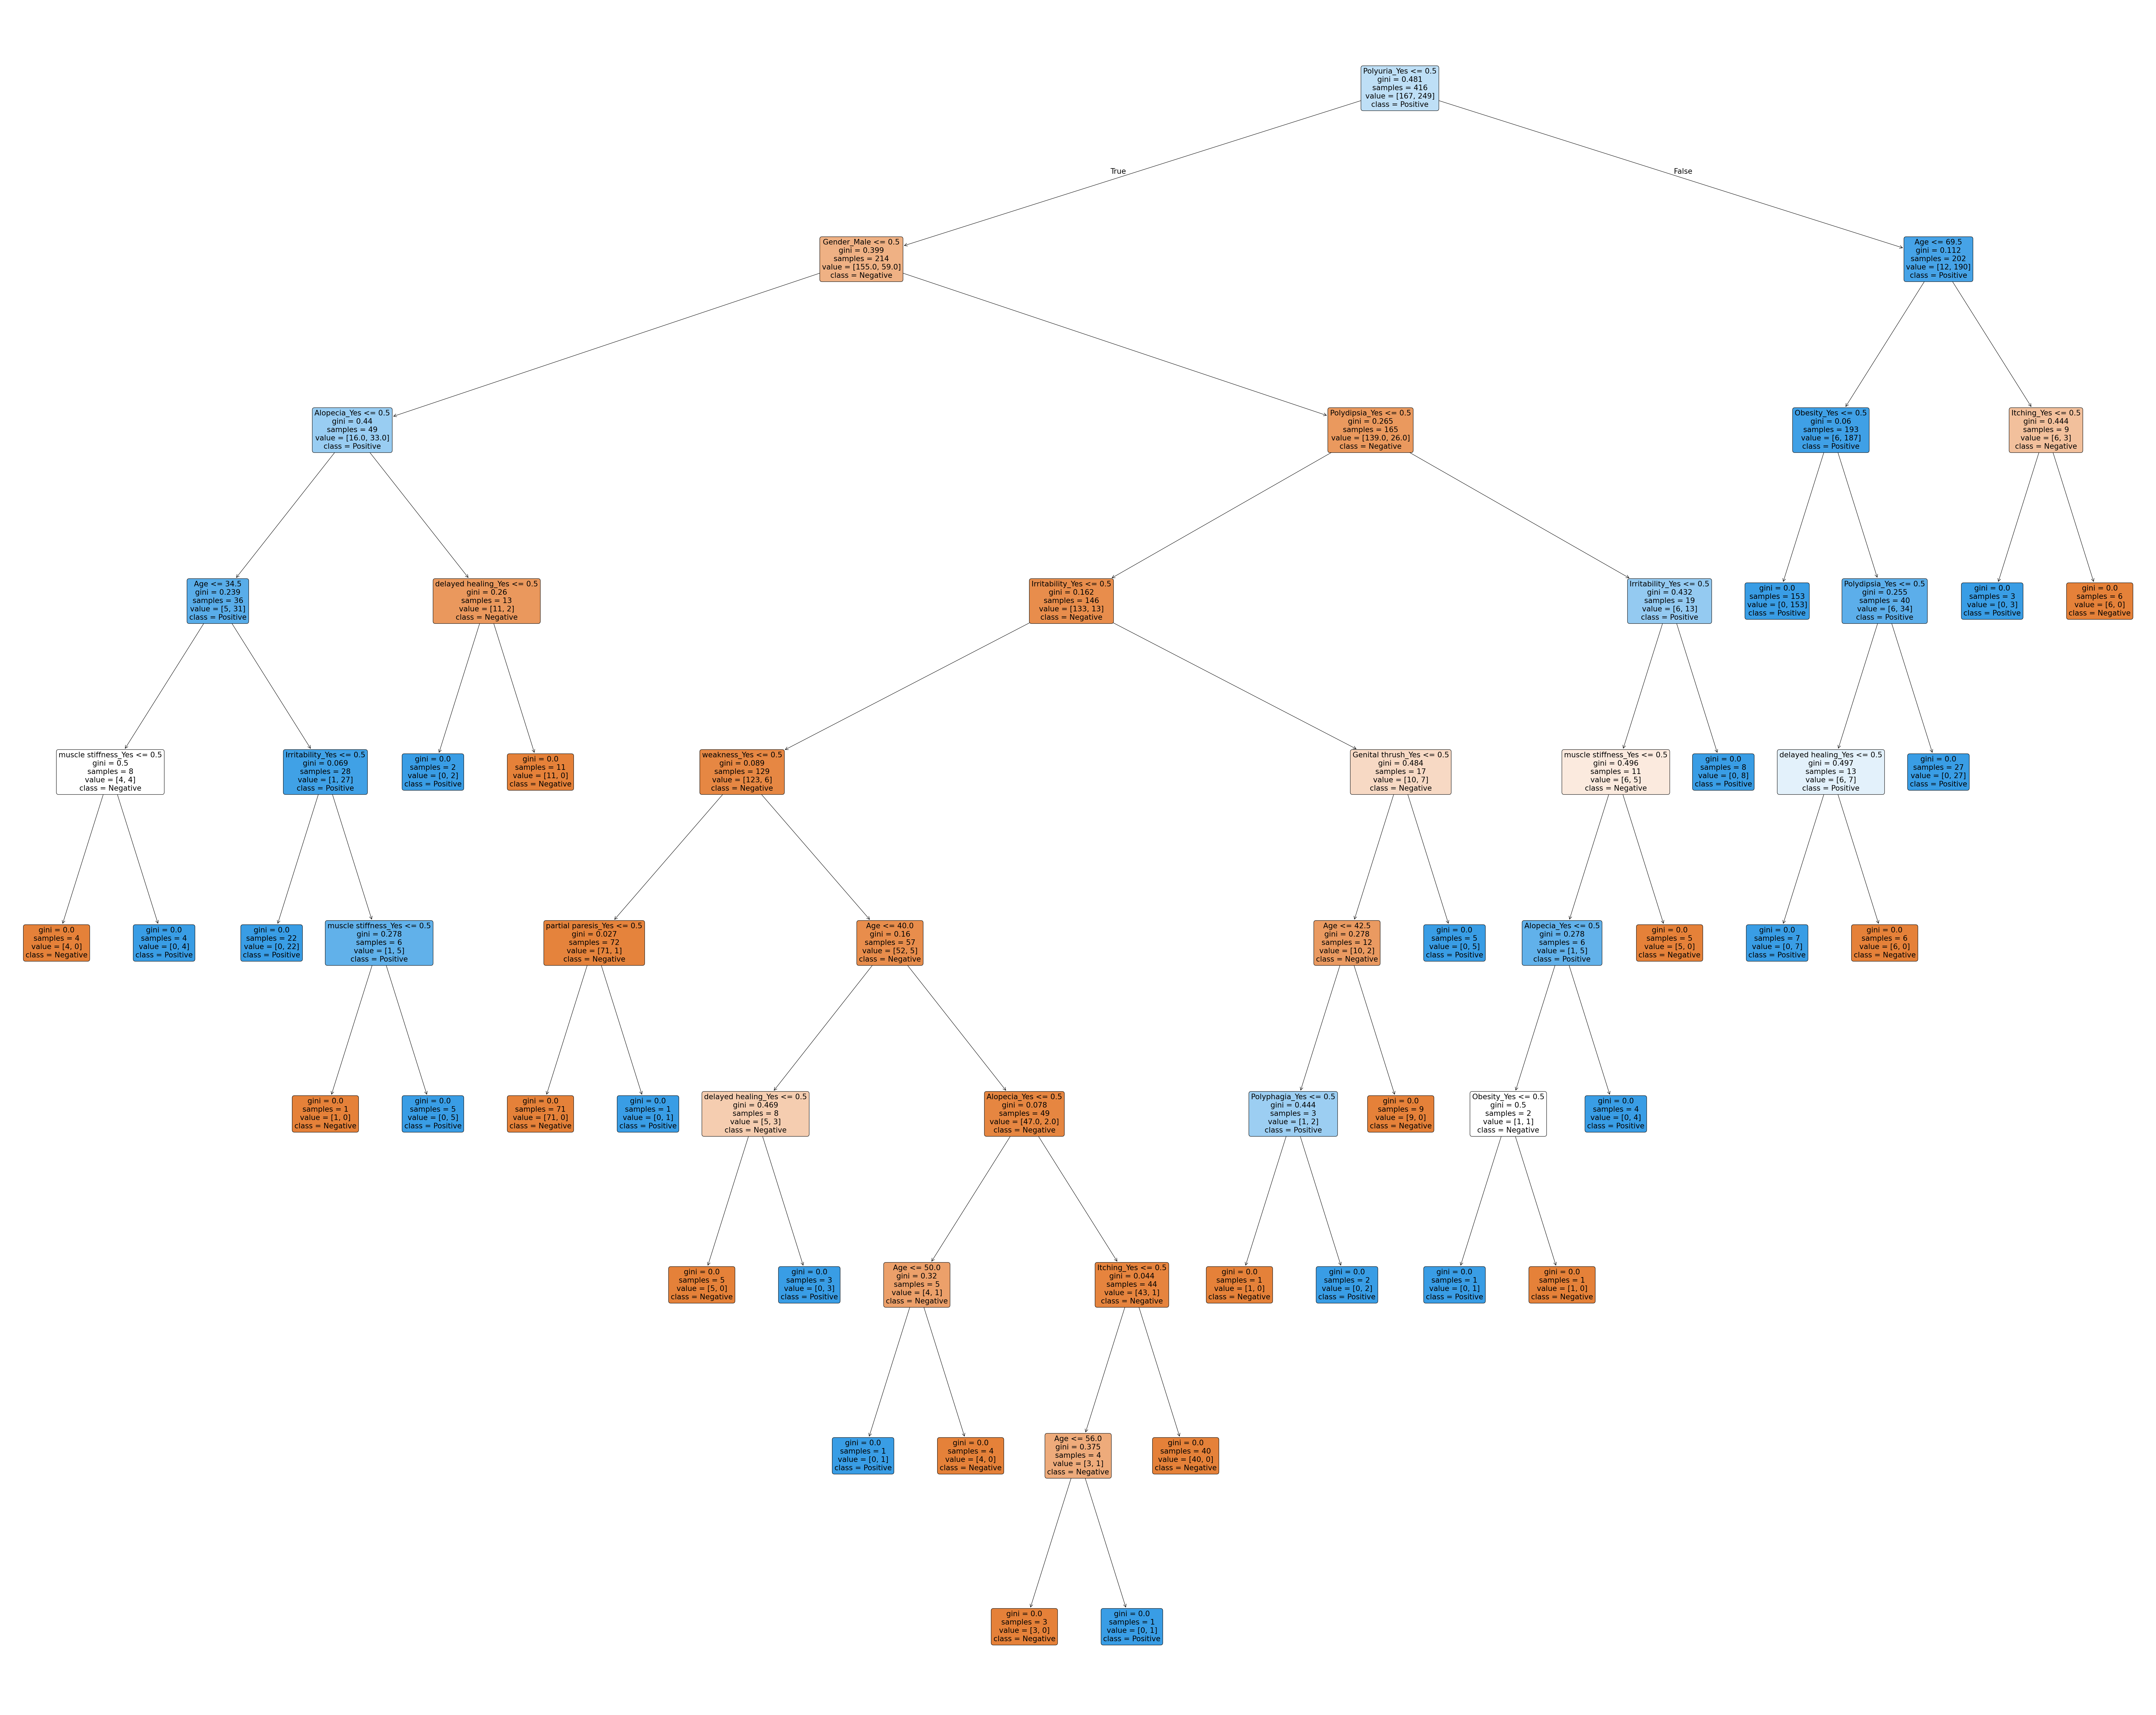

In [ ]:
Fig, ax = plt.subplots(figsize=(100,80))
_ = tree.plot_tree(model,
               feature_names=X.columns,
               class_names=['Negative', 'Positive'], # Replace with class names
               filled=True,
               rounded=True)
plt.show()

In [ ]:
#To save the figure to the png file:
Fig.savefig("diabetes_gini.png")

In [ ]:
model1 = DecisionTreeClassifier(criterion='entropy',random_state=1234)
model1 = model1.fit(X, y)

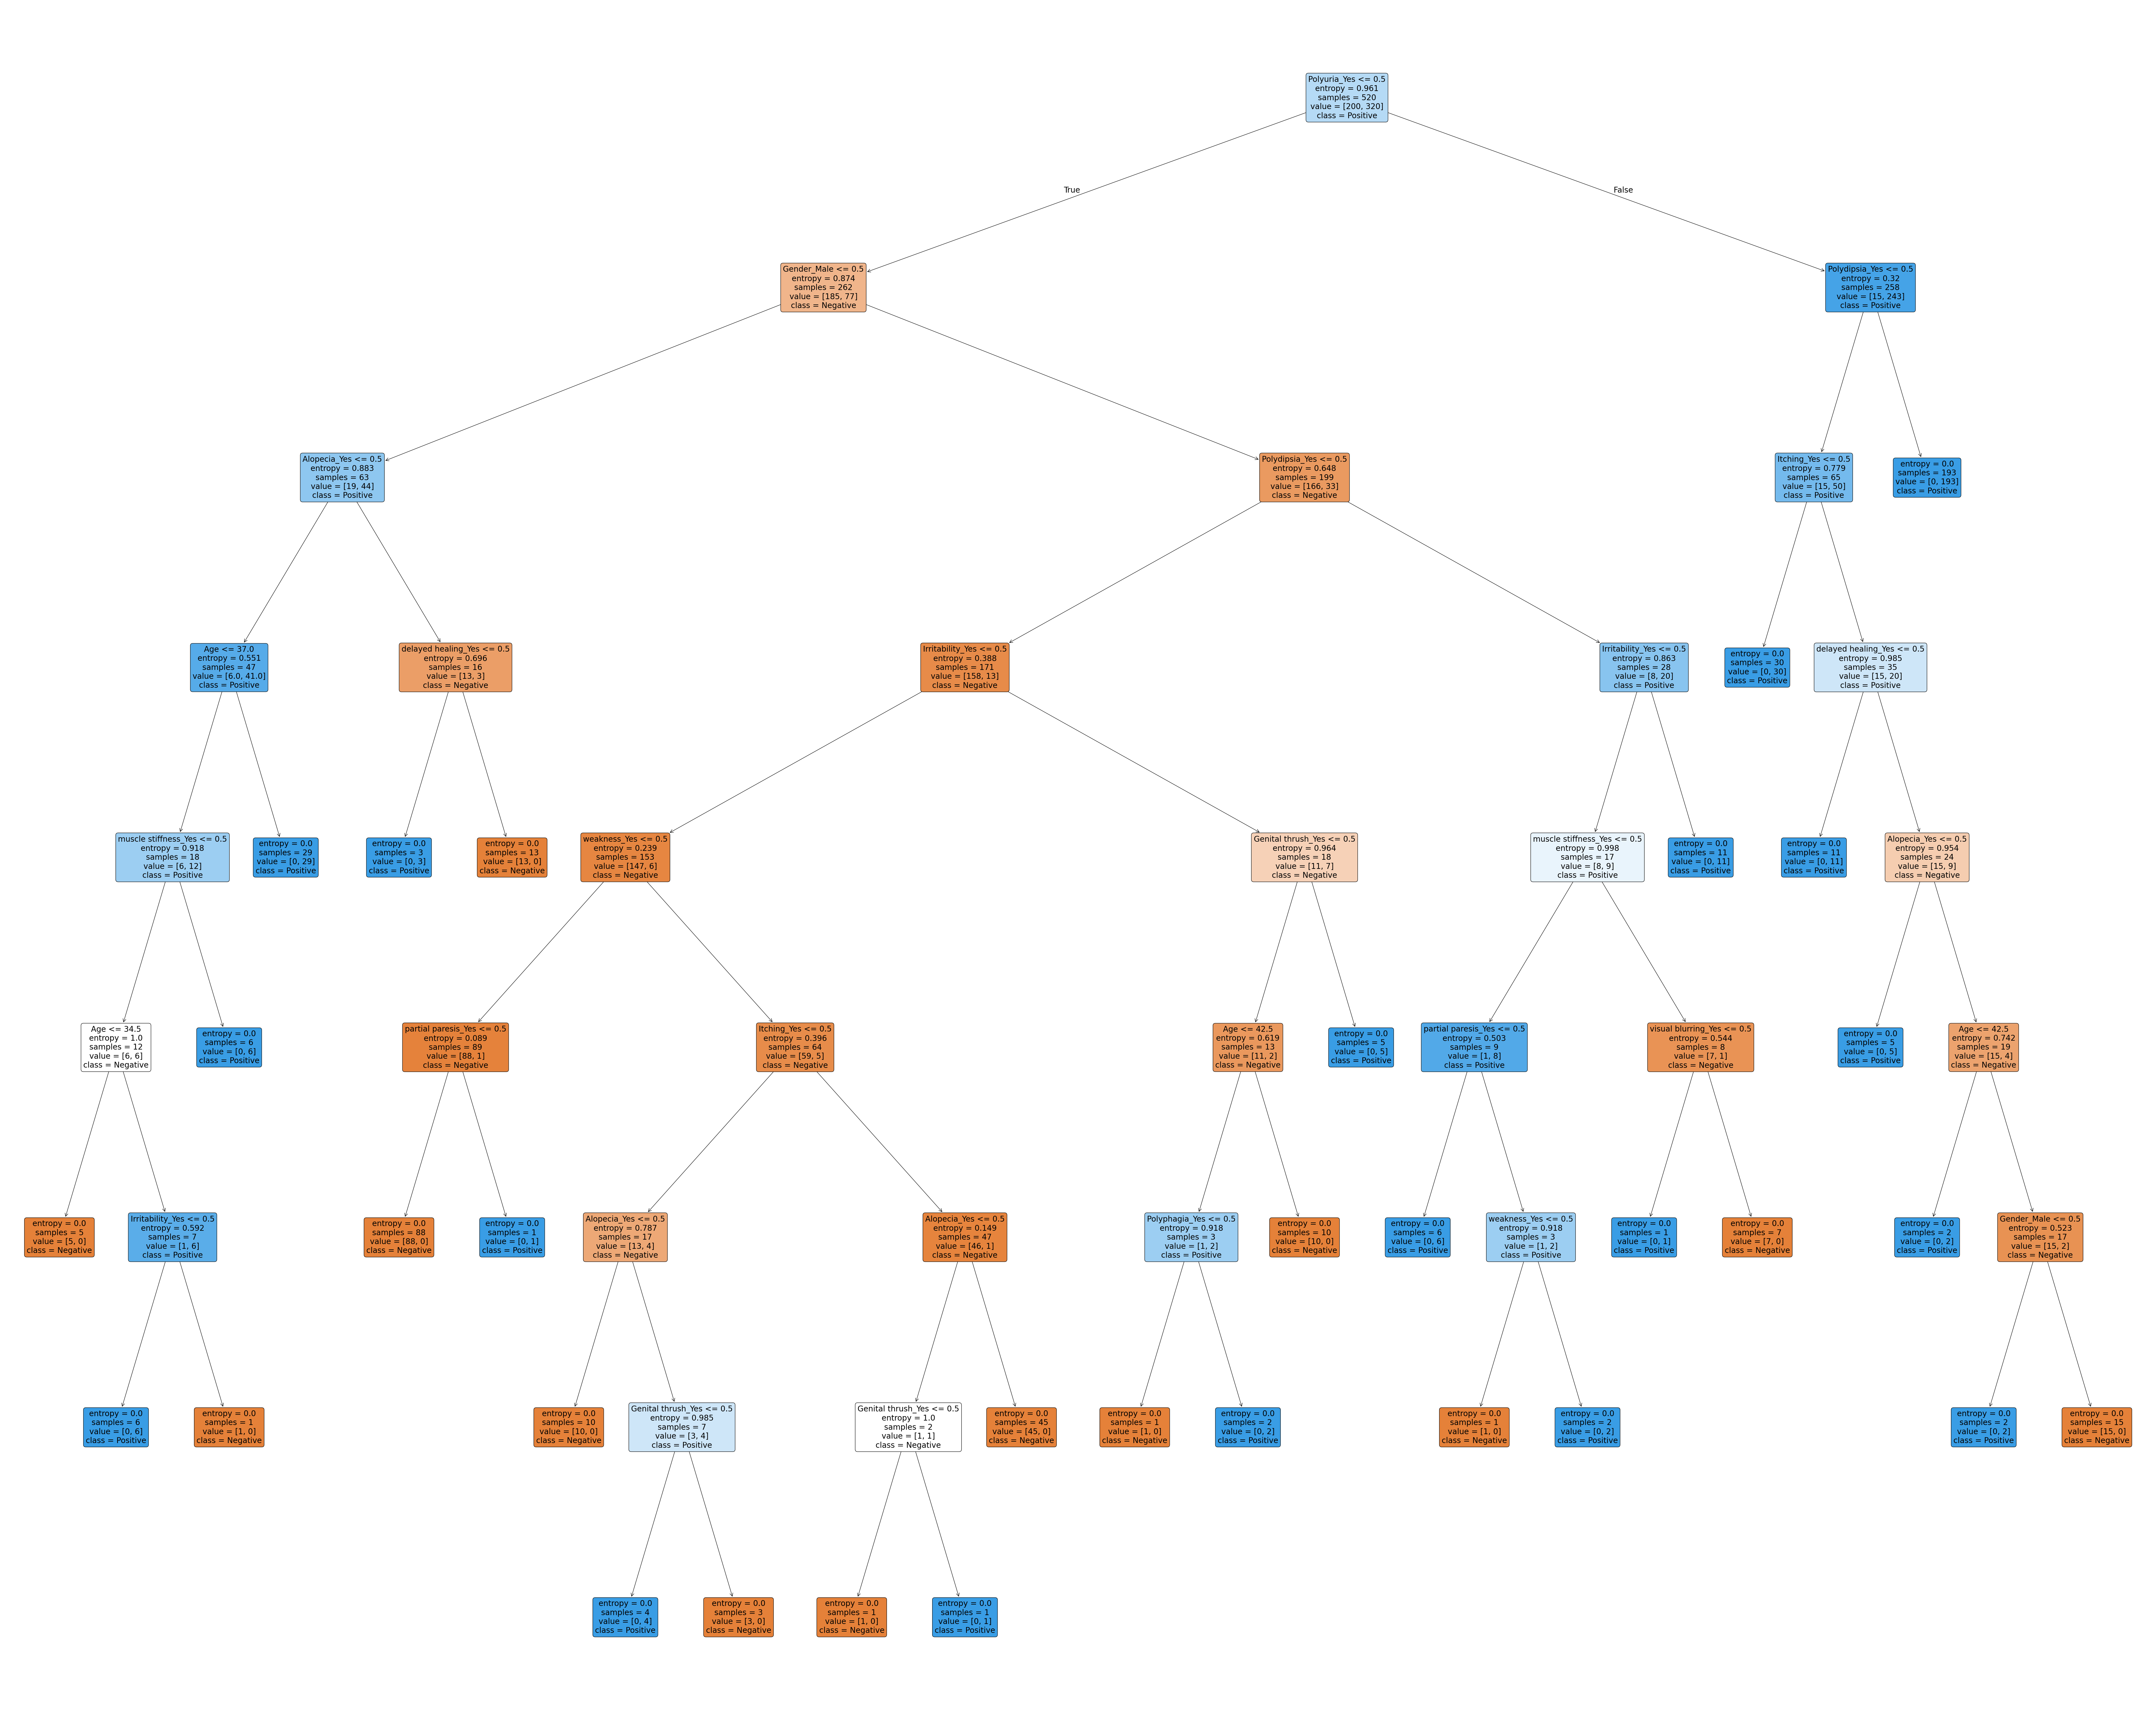

In [ ]:
Fig, ax = plt.subplots(figsize=(100,80))
_ = tree.plot_tree(model1,
                   feature_names=X.columns,
                   class_names=['Negative', 'Positive'], # Replace with class names
                   filled=True,
                   rounded=True)
plt.show()
Fig.savefig("diabetes_entropy.png")

# **Prediction and Evaluation**

**Make predictions**

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y1_pred = model1.predict(X_test)

**Evaluate the model**

***Accuracy***

In [ ]:
accuracy_gini = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_gini}")

Accuracy: 0.9519230769230769


In [ ]:
accuracy_entropy = accuracy_score(y_test, y1_pred)
print(f"Accuracy: {accuracy_entropy}")

Accuracy: 1.0


***Precision***

In [ ]:
precision_gini = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
print(f"Precision: {precision_gini}")

Precision: 0.958248987854251


In [ ]:
precision_entropy = precision_score(y_test, y1_pred, average='weighted')  # 'weighted' for multi-class
print(f"Precision: {precision_entropy}")

Precision: 1.0


***F1 Score***

In [ ]:
f1_gini = f1_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class
print(f"F1 Score: {f1_gini}")

F1 Score: 0.9527386102126515


In [ ]:
f1_entropy = f1_score(y_test, y1_pred, average='weighted')  # 'weighted' for multi-class
print(f"F1 Score: {f1_entropy}")

F1 Score: 1.0


**Pictorial Representation of Result**

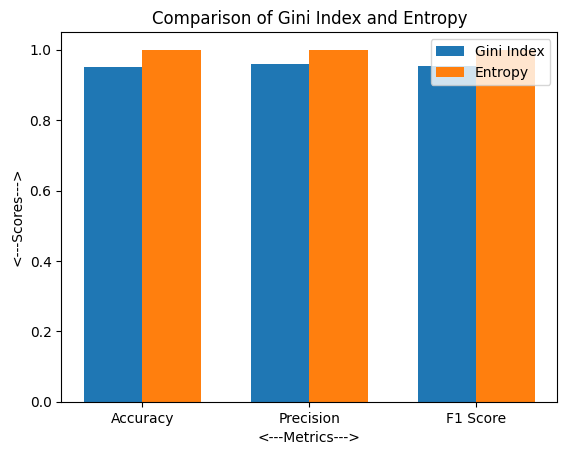

In [ ]:
# Store the metrics for each model
gini_metrics = [accuracy_gini, precision_gini, f1_gini]
entropy_metrics = [accuracy_entropy, precision_entropy, f1_entropy]

# Metric labels for the x-axis
metrics_labels = ['Accuracy', 'Precision', 'F1 Score']

# Create the bar plot
bar_width = 0.35  # Width of each bar
index = np.arange(len(metrics_labels))  # X-axis positions for the bars

plt.bar(index, gini_metrics, bar_width, label='Gini Index')
plt.bar(index + bar_width, entropy_metrics, bar_width, label='Entropy')

# Add labels, title, and legend
plt.xlabel('<---Metrics--->')
plt.ylabel('<---Scores--->')
plt.title('Comparison of Gini Index and Entropy')
plt.xticks(index + bar_width / 2, metrics_labels)  # Center the x-axis labels
plt.legend()

# Display the plot
plt.show()

# **Summary:**

**Data Analysis Key Findings:**

This project focuses on predicting early-stage diabetes risk using a Decision Tree classifier on the diabetes_data_upload.csv dataset. So far, the key steps completed include:

Data Loading and Preprocessing: The dataset was loaded, and checked for missing values (none were found). Categorical features were converted into a numerical format using one-hot encoding. Model Training: A Decision Tree classifier was trained on the preprocessed data. Two models were trained, one using the Gini impurity criterion and another using entropy. Model Evaluation: The performance of both models was evaluated using accuracy, precision, and F1-score on a test set. The results show that the model trained with the entropy criterion achieved perfect scores (1.0) on these metrics for the given test set.

**Insights or Next Steps:**

*  **Investigate Potential Overfitting:** Further analyze the models, particularly the entropy-based one, to check for overfitting. This could involve techniques like cross-validation, pruning the tree, or using regularization.
*  **Feature Importance Analysis:** Identify which features (symptoms) are most important in the decision tree's prediction process. This can provide valuable insights into the key indicators of early-stage diabetes in this dataset.
*  **Visualize Feature Importance:** Create a visualization to show the relative importance of each feature.
*  **Consider Other Models:** Explore other classification algorithms (e.g., Logistic Regression, Support Vector Machines, Random Forests) to compare their performance with the Decision Tree models.
*  **Hyperparameter Tuning:** Optimize the hyperparameters of the chosen models to potentially improve performance and generalization.
*  **Model Interpretation:** Provide a more detailed interpretation of the final chosen model, explaining how it makes predictions based on the features.
*  **Deployment (Optional):** If the model is deemed robust and accurate, consider steps for deploying it for practical use.